In [24]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgbm


In [6]:
# Load data

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

attributes = ["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea"]
x_train = df_train[attributes]
y_train = df_train["SalePrice"]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


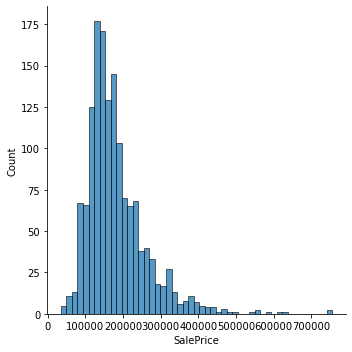

In [4]:
print(df_train["SalePrice"].describe())
sns.displot(df_train["SalePrice"])

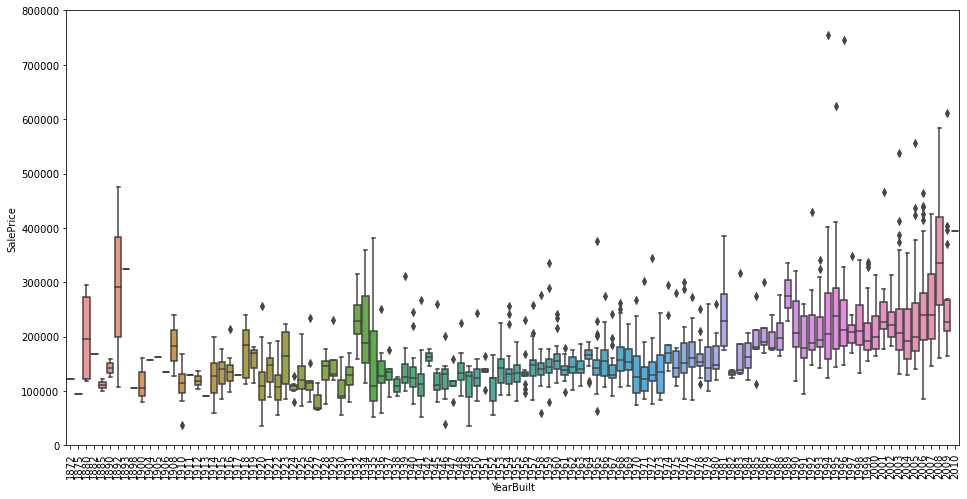

In [37]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [25]:
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [5]:
x_test = df_test[attributes].fillna(0)

predictions = rf_reg.predict(x_test)

NameError: name 'rf_reg' is not defined

In [16]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
lgbm_reg = lgbm.LGBMRegressor()
lgbm_reg.fit(x_train, y_train)

In [25]:
svm_reg = SVR()
svm_reg.fit(x_train, y_train)

SVR()

In [27]:
svm_predictions = svm_reg.predict(x_test)
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": np.array(svm_predictions)})
submission.to_csv("submissions/first_svm_test_submission.csv", index=False)

In [22]:
lgbm_predictions = lgbm_reg.predict(x_test)
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": np.array(lgbm_predictions)})
submission.to_csv("submissions/first_lgbm_test_submission.csv", index=False)

In [17]:
xgb_predictions = xg_reg.predict(x_test)
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": np.array(xgb_predictions)})
submission.to_csv("submissions/first_xgb_test_submission.csv", index=False)

In [28]:
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": np.array(predictions)})
submission.to_csv("submissions/second_test_submission.csv", index=False)